# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import emoji
import collections
from datetime import datetime
from textblob import TextBlob
# from PIL import Image



# import re
# from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

# Load Data

In [2]:
#open the file

messages = pd.read_pickle('messages.pkl')
messages['created_at'] = pd.to_datetime(messages['created_at'],unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
messages['Date'] = messages['created_at'].dt.strftime('%Y-%m-%d')
messages['Hour'] = messages['created_at'].dt.strftime('%H')
messages['Time'] = messages['created_at'].dt.strftime('%r')

# Analysis

My family has a really active group chat.  Rarely does a day pass that someone doesn't send a message.  Sometimes, I will lose service and return having missed 60+ messages.

With all that data, I thought it would be fun to learn a bit more about my family by looking at their messaging trends.

The family, from my parents to their grandchildren, is comprised of 22 individuals as seen below.  Only 9 of those are active on the group chat (marked in blue).



<img src="files/img/FamilyTree.png">

In [3]:
dicFdf = {}
s = " ~ "
for person, frame in messages.groupby('name'):
    
    dicFdf[person] = []
    dicFdf[person].append(len(frame))
    dicFdf[person].append(len(frame[frame['attachments'].apply(lambda c: c!=[])]))
    dicFdf[person].append(round(len(frame[frame['attachments'].apply(lambda c: c!=[])])/len(frame)*100,2))
    dicFdf[person].append(frame['favorited_by'].str.len().sum())
    dicFdf[person].append(round(frame['favorited_by'].str.len().sum()/len(frame),2))
    dicFdf[person].append(int(frame['text'].str.split().str.len().sum()))
    dicFdf[person].append(round(int(frame['text'].str.split().str.len().sum())/len(frame),2))
    txt = frame['text'].str.cat(sep=' ')
    dicFdf[person].append(txt)
    
    favEmojstr = []
    emojis = ''.join(c for c in txt if c in emoji.UNICODE_EMOJI)
    favEmojis = collections.Counter(emojis).most_common(5)
    favEmojstr.append(s.join([x[0] for x in favEmojis]))
    dicFdf[person].append(len(emojis))
    dicFdf[person].append(len(emojis)/len(frame))
    dicFdf[person].append(favEmojstr)
    
    
    
    
headerlist = ['Number of Messages', 'Attachments', '% Attachments', 
              'Favorites', 'Favorites per Message', 'Total Words', 
              'Words per Message', 'Messages', 'Number of Emojis', 
              'Emojis per Message', 'Favorite Emojis' ]
                          
perPerson = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')

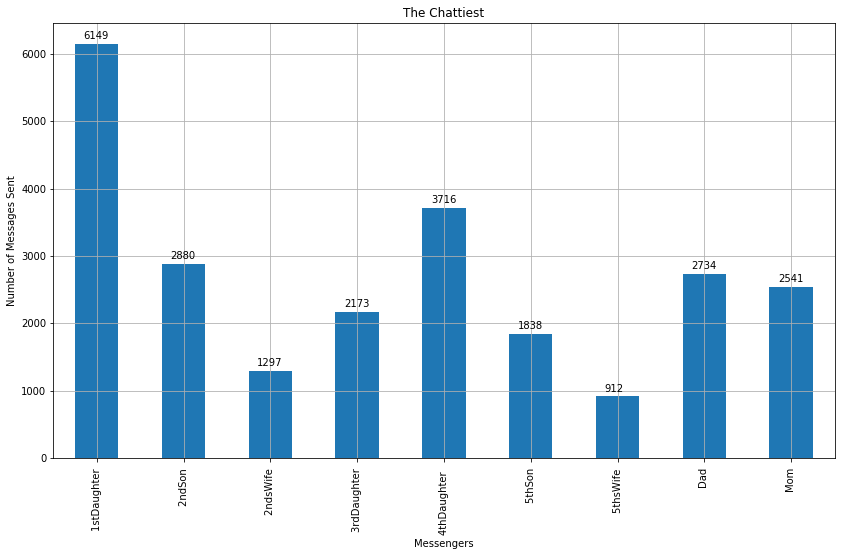

In [4]:
ax = perPerson['Number of Messages'].plot(kind='bar', 
                                grid=True, 
                                figsize=(14,8),
                                title="The Chattiest")
ax.set(xlabel="Messengers", ylabel="Number of Messages Sent")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + .1 , p.get_height() + 75))

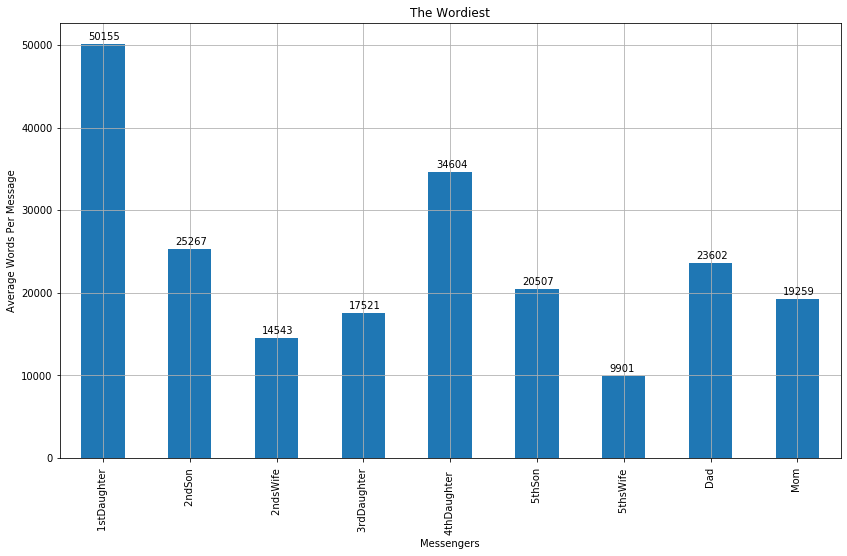

In [5]:
ax = perPerson['Total Words'].plot(kind='bar', 
                                   grid=True, 
                                   figsize=(14,8),
                                   title="The Wordiest")
ax.set(xlabel="Messengers", ylabel="Average Words Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() + .085, p.get_height() + 500))

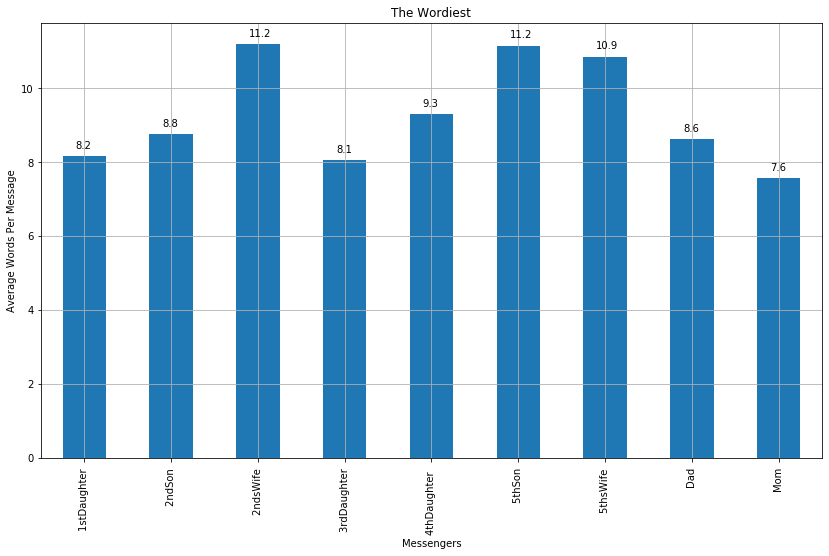

In [6]:
ax = perPerson['Words per Message'].plot(kind='bar', 
                                         grid=True, 
                                         figsize=(14,8),
                                         title="The Wordiest")
ax.set(xlabel="Messengers", ylabel="Average Words Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() + .15, p.get_height() + .2))

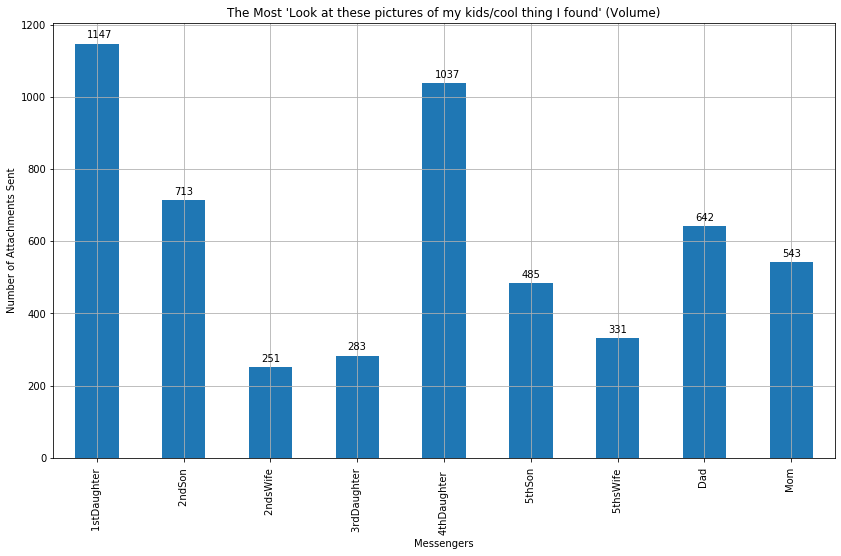

In [7]:
ax = perPerson['Attachments'].plot(kind='bar', 
                                   grid=True, 
                                   figsize=(14,8),
                                   title="The Most 'Look at these pictures of my kids/cool thing I found' (Volume)")
ax.set(xlabel="Messengers", ylabel="Number of Attachments Sent")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + .14, p.get_height() + 15))

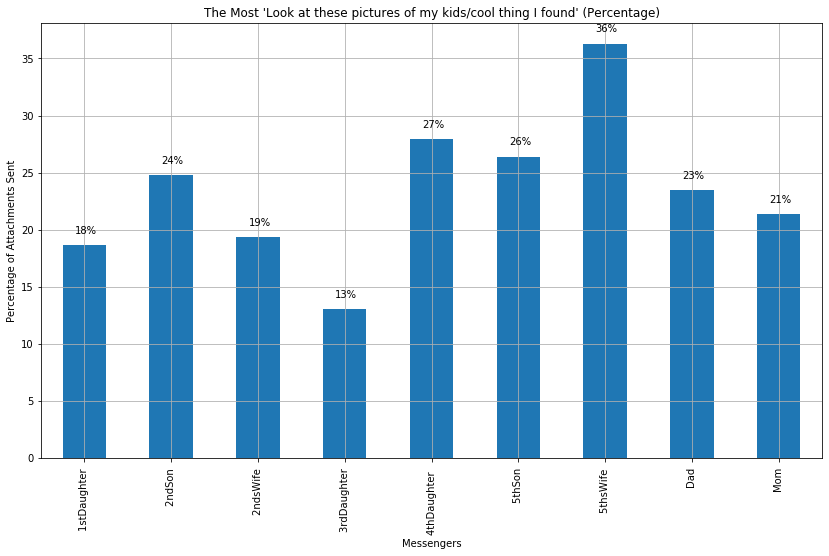

In [8]:
ax = perPerson['% Attachments'].plot(kind='bar', 
                                     grid=True, 
                                     figsize=(14,8),
                                     title="The Most 'Look at these pictures of my kids/cool thing I found' (Percentage)")
ax.set(xlabel="Messengers", ylabel="Percentage of Attachments Sent")
for p in ax.patches:
    ax.annotate(str(int(p.get_height()))+'%', (p.get_x() + .14, p.get_height() + 1))

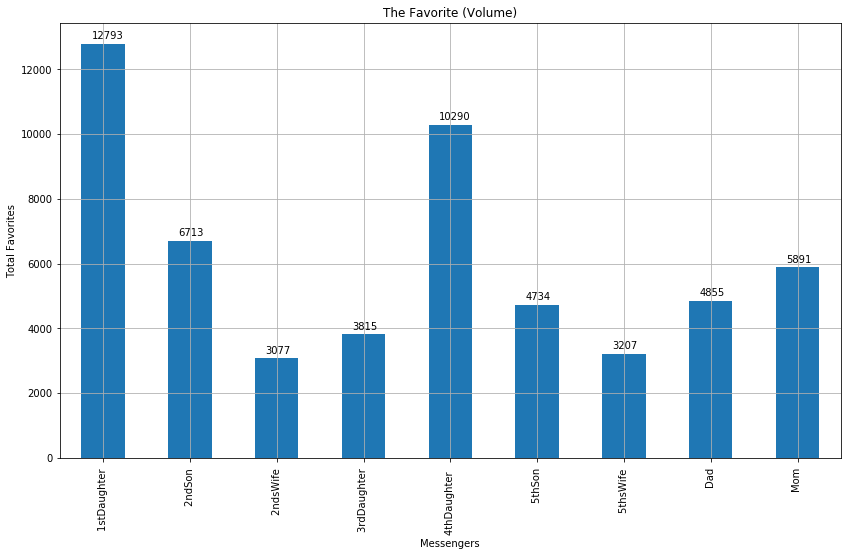

In [9]:
ax = perPerson['Favorites'].plot(kind='bar', grid=True, figsize=(14,8),title="The Favorite (Volume)")
ax.set(xlabel="Messengers", ylabel="Total Favorites")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +.12, p.get_height() +150))

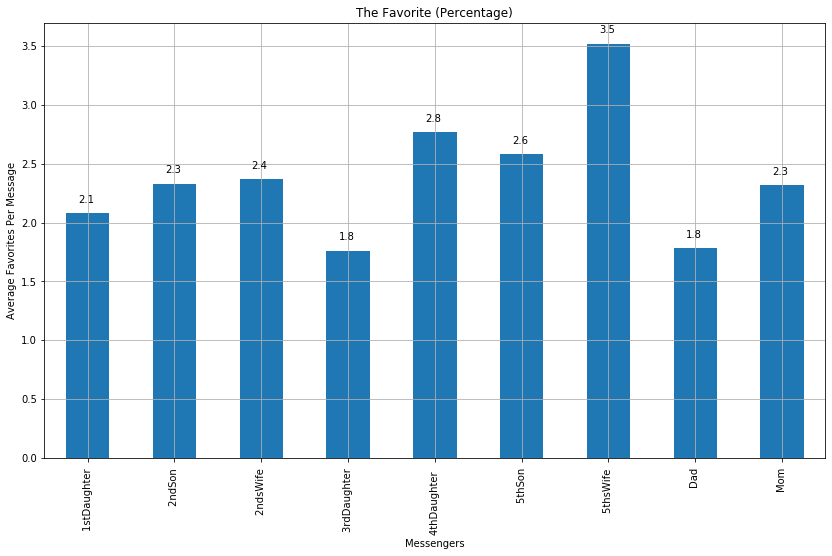

In [10]:
ax = perPerson['Favorites per Message'].plot(kind='bar', 
                                         grid=True, 
                                         figsize=(14,8),
                                         title="The Favorite (Percentage)")
ax.set(xlabel="Messengers", ylabel="Average Favorites Per Message")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)), (p.get_x() +.14, p.get_height() +.09))

# Analysis of message contents per person

1stDaughter 


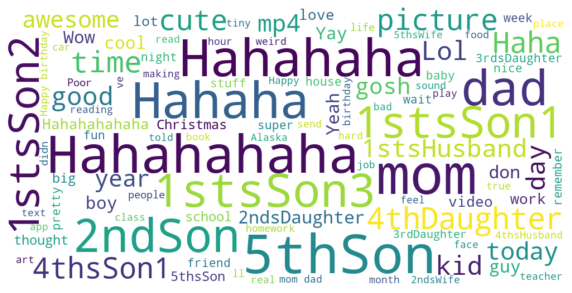

2ndSon 


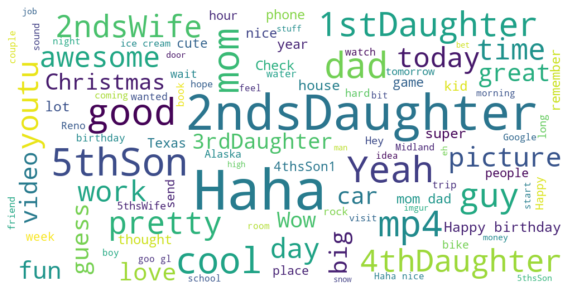

2ndsWife 


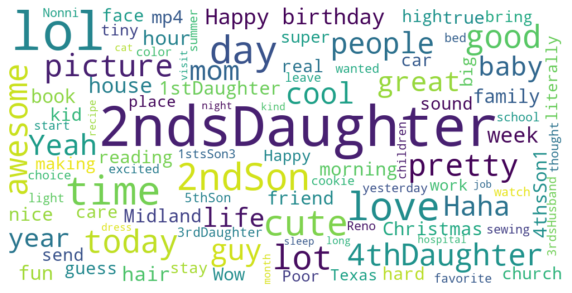

3rdDaughter 


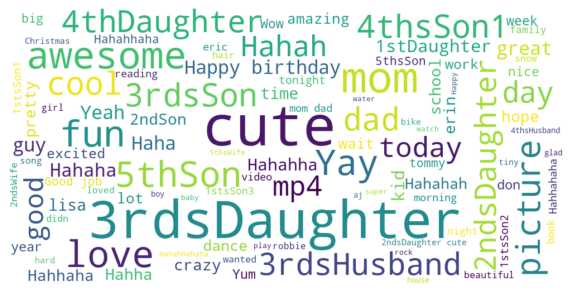

4thDaughter  


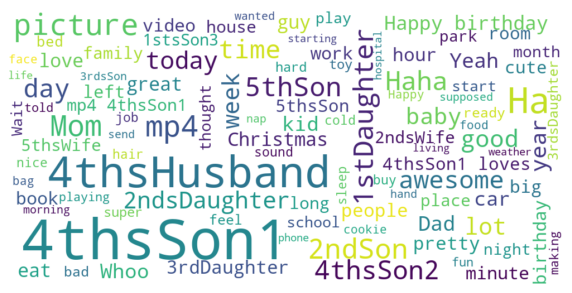

5thSon 


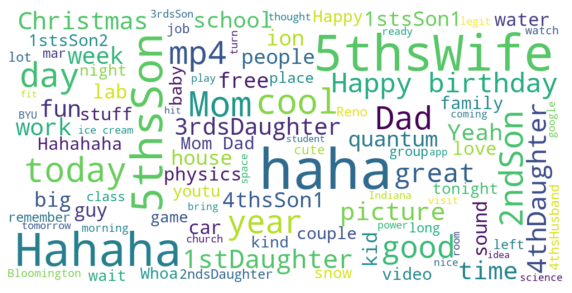

5thsWife 


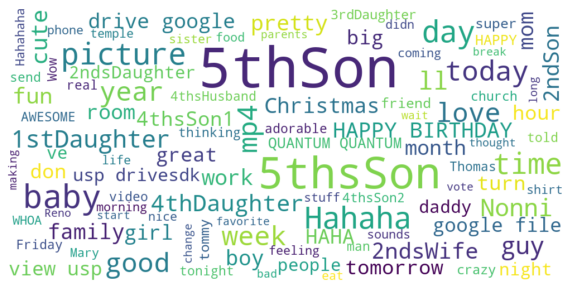

Dad 


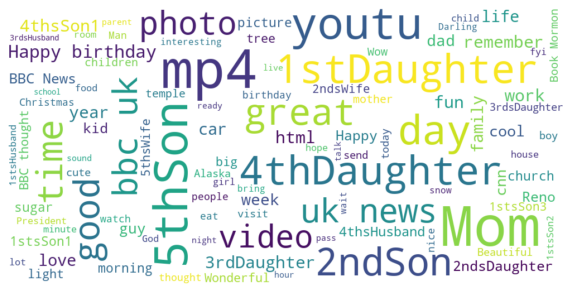

Mom 


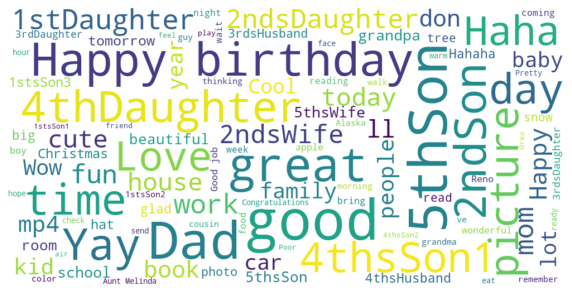

In [11]:
stopwords = set(line.strip() for line in open('stopwords1.txt'))
stopwords = stopwords.union(set(['https','groupme','640x360r90', '568x320r90','http','640x360r','mp4https']))

for x in list(perPerson.index):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, 
                          width=1000, 
                          height=500,
                          max_font_size=100, 
                          max_words=100, 
                          background_color="white").generate(perPerson.loc[x]['Messages'])
    print(x)
    # Display the generated image:
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#     # Save the image in the img folder:
#     wordcloud.to_file("Analbumcover/"+x+"_WC.png")

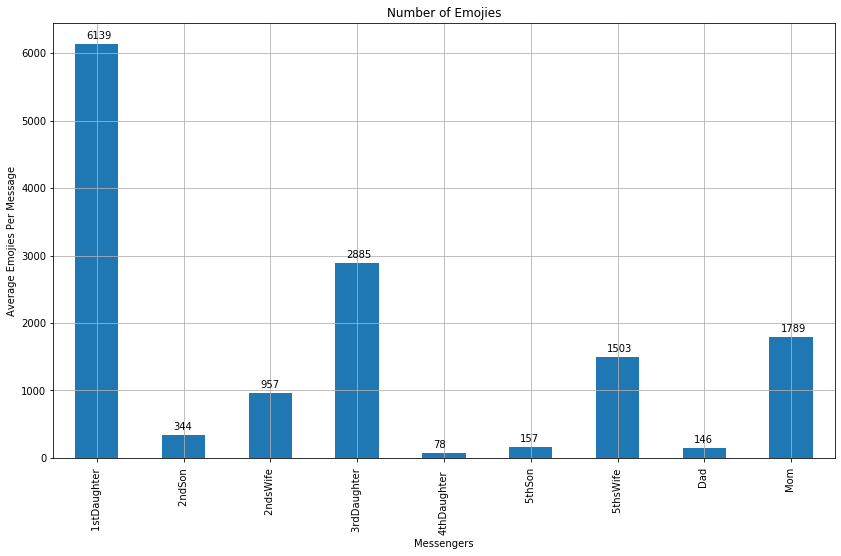

In [12]:
ax = perPerson['Number of Emojis'].plot(kind='bar', 
                                        grid=True, 
                                        figsize=(14,8),
                                        title="Number of Emojies")
ax.set(xlabel="Messengers", ylabel="Average Emojies Per Message")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() + 75))

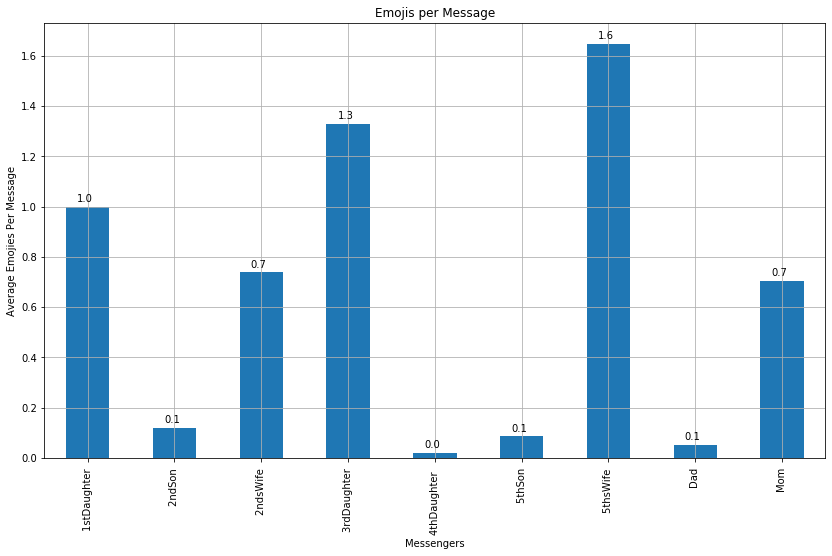

In [13]:
ax = perPerson['Emojis per Message'].plot(kind='bar', 
                                          grid=True, 
                                          figsize=(14,8),
                                          title="Emojis per Message")
ax.set(xlabel="Messengers", ylabel="Average Emojies Per Message")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

# Analysis of messages through time

In [14]:
personlist = list(perPerson.index)
dicFdf = {}
for day, frame in messages.groupby('Date'):
    dicFdf[day] = []
    dicFdf[day].append(frame['id'].count())
    values = frame['name'].value_counts()
    for person in personlist:
        if person in list(values.index):
            dicFdf[day].append(values.loc[person])
        else:
            dicFdf[day].append(np.nan)
    
headerlist = ['Message Count']+ personlist

daydf = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')

In [15]:
monthdf = daydf.reset_index()
monthdf = monthdf.rename(columns={'index':'Date'})
monthdf['Date'] = pd.to_datetime(monthdf['Date'], format="%Y-%m-%d")
monthdf = monthdf.resample('M', on='Date').sum()
for column in list(monthdf.columns)[1:]:
    monthdf['% '+column] = round(monthdf[column]/monthdf['Message Count']*100, 2)

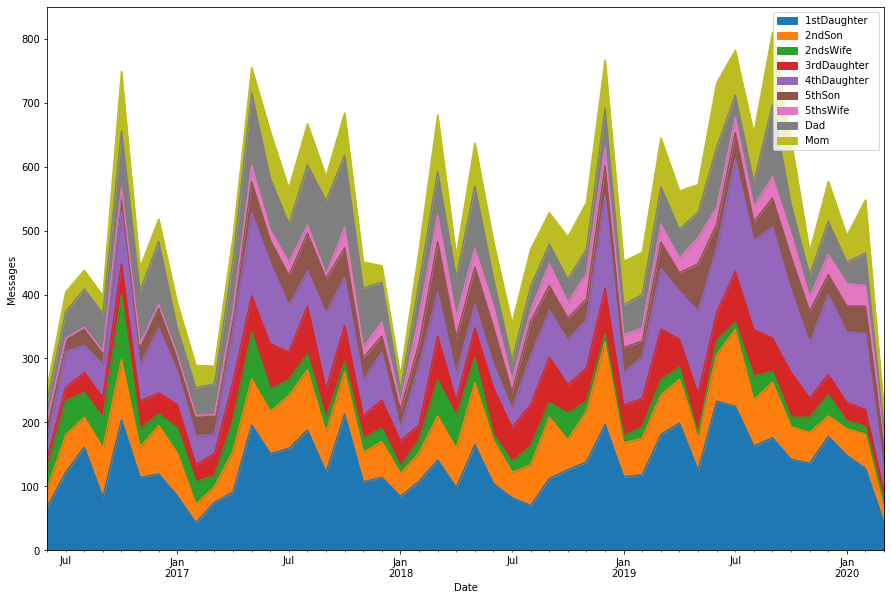

In [16]:
ax = monthdf.plot.area(y=list(monthdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

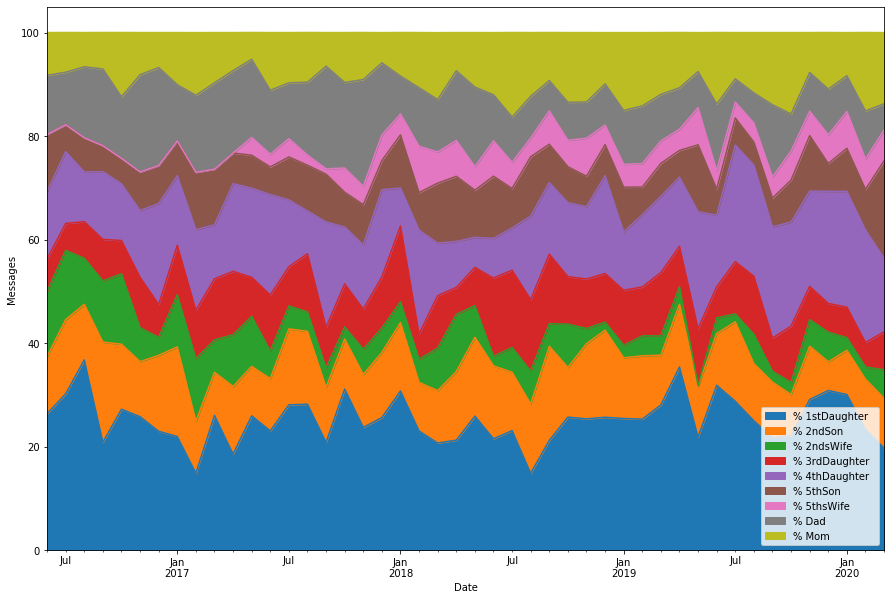

In [17]:
ax = monthdf.plot.area(y=list(monthdf.columns)[10:],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

In [18]:
personlist = list(perPerson.index)
dicFdf = {}
for day, frame in messages.groupby('Hour'):
    dicFdf[day] = []
    dicFdf[day].append(frame['id'].count())
    values = frame['name'].value_counts()
    for person in personlist:
        if person in list(values.index):
            dicFdf[day].append(values.loc[person])
        else:
            dicFdf[day].append(np.nan)
    
headerlist = ['Message Count']+ personlist

hourdf = pd.DataFrame.from_dict(dicFdf, columns=headerlist, orient='index')

for column in list(hourdf.columns)[1:]:
    hourdf['% '+column] = round(hourdf[column]/hourdf['Message Count']*100, 2)

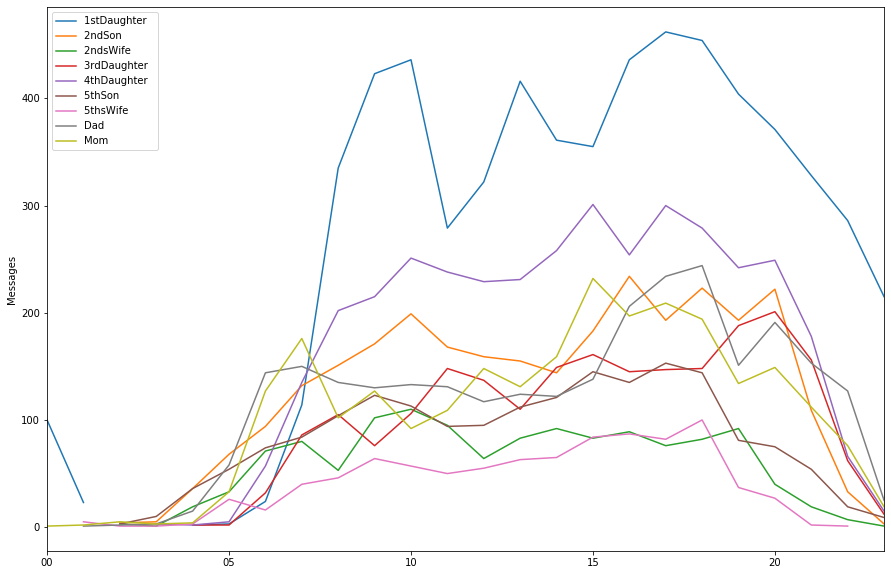

In [19]:
ax = hourdf.plot(y=list(hourdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

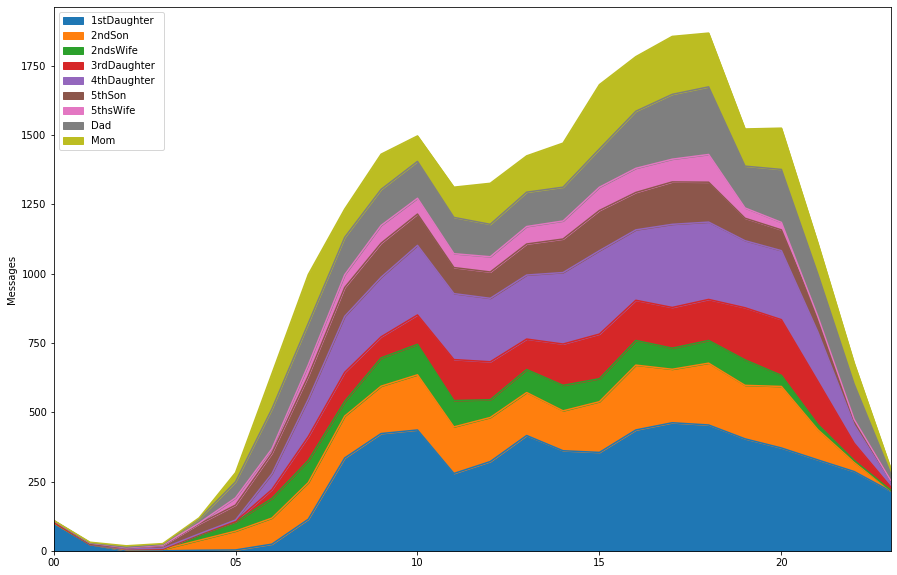

In [20]:
ax = hourdf.plot.area(y=list(hourdf.columns)[1:10],figsize=(15,10));
ax.set_ylabel('Messages')
plt.show()

# Sentiment

In [21]:
def getsentiment(message):
    if isinstance(message, str):
        analysis = TextBlob(message)
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    else:
        return np.nan

messages['Sentiment'] = messages['text'].apply(getsentiment)

In [22]:
dicFdf = {}
for person, frame in messages.groupby('name'):
    dicFdf[person] = []
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['positive'])
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['negative'])
    dicFdf[person].append(round(frame['Sentiment'].value_counts()/len(frame)*100,2)['neutral'])

headerlist = ['% Positive', '% Negative', '% Neutral']

tempdf = pd.DataFrame.from_dict(dicFdf,orient='index',columns=headerlist)
perPerson = pd.concat([perPerson, tempdf], axis=1)


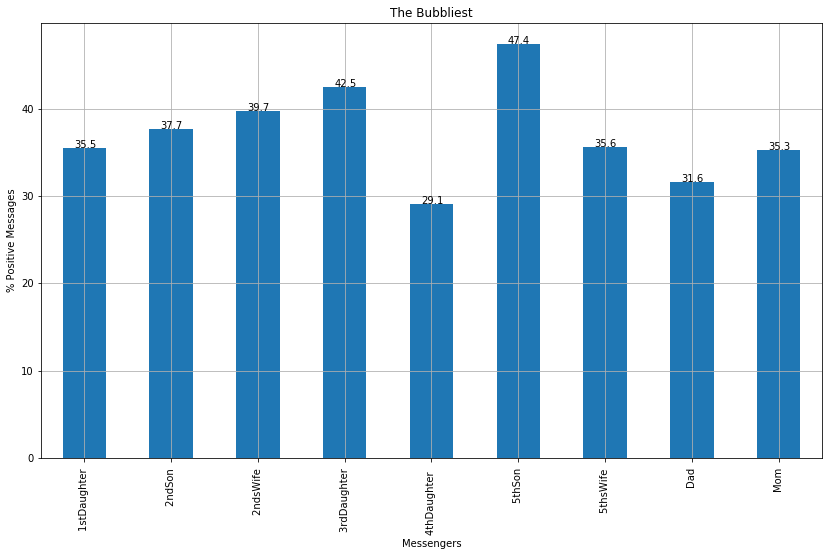

In [23]:
ax = perPerson['% Positive'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Bubbliest")
ax.set(xlabel="Messengers", ylabel="% Positive Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

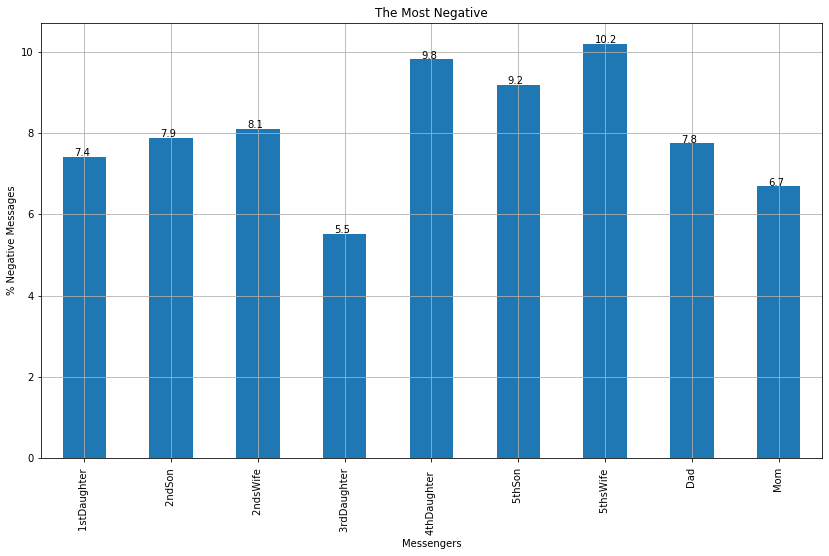

In [24]:
ax = perPerson['% Negative'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Most Negative")
ax.set(xlabel="Messengers", ylabel="% Negative Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))

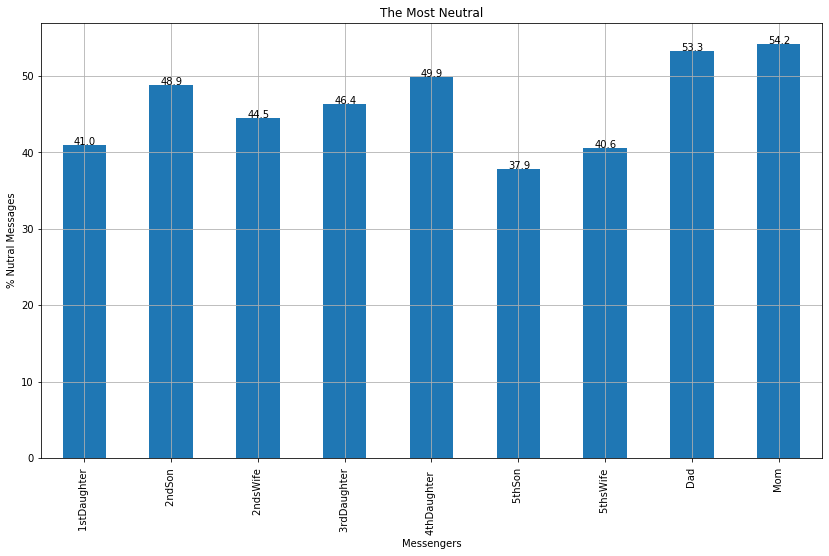

In [25]:
ax = perPerson['% Neutral'].plot(kind='bar', 
                                  grid=True, 
                                  figsize=(14,8),
                                  title="The Most Neutral")
ax.set(xlabel="Messengers", ylabel="% Nutral Messages")
for p in ax.patches:
    ax.annotate(round(p.get_height(),1), (p.get_x() + .13, p.get_height() +.02))